<a href="https://colab.research.google.com/github/yanhashi521/pokemo_graph_drawing/blob/main/pokemon_graph_draw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
%cd drive/MyDrive/graph/
%ls

[Errno 2] No such file or directory: 'drive/MyDrive/graph/'
/content/drive/MyDrive/graph
graph/                  pokemon/                   pokemon_graph_submit5.png
kamada_kawai_graph.png  pokemon_graph_submit2.png  pokemon_graph_submit.png
kamada_kawai.ipynb      pokemon_graph_submit3.png  result.png
metro/                  pokemon_graph_submit4.png


In [13]:
import json
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse.csgraph import floyd_warshall
from networkx.readwrite import json_graph
import math
import random

filename = open('./pokemon/Season31_Single_master.json','r')
graph = json.load(filename)

data = ["888","145","645","898","132","248","382","598","233","717","250","195","537","800","778","815","727"
,"113","890","892","716","423","861","450","894","797","644","473","445","646","483","882","788",
"718","131","576","887"]

top = {}

#for i in range(10):
#  top[data[i]] = graph[data[i]]["0"]["temoti"]["pokemon"] 

#top

for i in range(len(data)):
  if i == "145":#サンダー
    top[data[i]] = graph[data[i]]["0"]["temoti"]["pokemon"]
  elif i == "645":#ランドロス
    top[data[i]] = graph[data[i]]["1"]["temoti"]["pokemon"]
  elif i == "898":#黒馬
    top[data[i]] = graph[data[i]]["2"]["temoti"]["pokemon"]
  else:
    top[data[i]] = graph[data[i]]["0"]["temoti"]["pokemon"]
top


for i in range(len(data)):
  for j in range(10):
    print('{\"source\" : ' +str(data[i]) +", \"target\": " + str(top[data[i]][j]["id"]) + "},")

{"source" : 888, "target": 145},
{"source" : 888, "target": 645},
{"source" : 888, "target": 898},
{"source" : 888, "target": 382},
{"source" : 888, "target": 233},
{"source" : 888, "target": 537},
{"source" : 888, "target": 132},
{"source" : 888, "target": 248},
{"source" : 888, "target": 195},
{"source" : 888, "target": 717},
{"source" : 145, "target": 888},
{"source" : 145, "target": 898},
{"source" : 145, "target": 645},
{"source" : 145, "target": 382},
{"source" : 145, "target": 537},
{"source" : 145, "target": 233},
{"source" : 145, "target": 727},
{"source" : 145, "target": 132},
{"source" : 145, "target": 248},
{"source" : 145, "target": 598},
{"source" : 645, "target": 888},
{"source" : 645, "target": 898},
{"source" : 645, "target": 248},
{"source" : 645, "target": 800},
{"source" : 645, "target": 145},
{"source" : 645, "target": 788},
{"source" : 645, "target": 382},
{"source" : 645, "target": 894},
{"source" : 645, "target": 795},
{"source" : 645, "target": 195},
{"source" 

In [19]:
nx.info(graph)
degree = graph.degree()
for i in degree:
  print(str(i[1]) + ", ")
  


34, 
35, 
34, 
36, 
32, 
20, 
22, 
23, 
20, 
24, 
17, 
13, 
14, 
21, 
14, 
14, 
11, 
13, 
14, 
14, 
11, 
11, 
11, 
10, 
11, 
10, 
10, 
10, 
11, 
10, 
10, 
10, 
10, 
10, 
10, 
10, 
10, 
1, 
0, 
0, 
0, 
0, 
0, 
1, 
0, 
1, 
0, 
0, 
1, 
1, 
1, 
1, 
1, 
1, 
1, 
1, 
1, 
1, 
1, 


In [18]:
graph.degree

DegreeView({888: 34, 145: 35, 645: 34, 898: 36, 132: 32, 248: 20, 382: 22, 598: 23, 233: 20, 717: 24, 250: 17, 195: 13, 537: 14, 800: 21, 778: 14, 815: 14, 727: 11, 113: 13, 890: 14, 892: 14, 716: 11, 423: 11, 861: 11, 450: 10, 894: 11, 797: 10, 644: 10, 473: 10, 445: 11, 646: 10, 483: 10, 882: 10, 788: 10, 718: 10, 131: 10, 576: 10, 887: 10, 555: 1, 249: 0, 812: 0, 260: 0, 479: 0, 197: 0, 383: 1, 257: 0, 547: 1, 292: 0, 242: 0, 795: 1, 530: 1, 324: 1, 227: 1, 806: 1, 830: 1, 626: 1, 146: 1, 880: 1, 36: 1, 642: 1})

In [17]:

pokemon_type = ["Normal","Fire","Water","Grass","Electric","Ice","Fighting"
                ,"Poison","Ground","Flying","Psychic","Bug","Rock","Ghost","Dragon","Dark","Steel","Fairy"]
#63
type_color = ["magenta","yellow","brown","hotpink","gray","tan","blue","green","gray","darkslategrey", "orange","blue","blue","hotpink","navy","orange","orange","gray","purple","crimson", "magenta","blue","darkslategrey","brown","yellow","silver","darkblue","lightblue","darkblue" ,"darkblue","silver","blue","blue","darkblue","blue","hotpink","darkblue","lightblue","hotpink", "green","blue","yellow","darkslategrey","brown","orange","green","lightgreen","gray","hotpink","lightgreen","brown","orange","silver","orange","green","gray","orange","darkblue","magenta"]
degree_node = ["34", "35", "34", "36", "32", "20", "22", "23", "20", "24", "17", "13", "14", "21", "14", "14", "11", "13", "14", "14", "11", "11", "10", "11", "10", "10", "10", "11", "10", "10", "10", "10", "10", "10", "10", "1", "0", "0", "0", "0", "0", "1", "0", "1", "0", "0", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1","0","0"]
degree_node = [int(i)*20 for i in degree_node]
graph.remove_nodes_from(["888","145","645","898","132"])
#graph.remove_node(250, 195, 537, 800, 778, 815, 727, 113, 890, 892, 716, 423, 861, 450, 894, 797, 644, 473, 445, 646, 483, 882, 788, 718, 131, 576, 887, 555, 249, 812, 260, 479, 197, 383, 257, 547, 292, 242, 795, 530, 324, 227, 806, 830, 626, 146, 880, 36, 642)

#type_color = []
#for i in range(59):
#  type_color.append("Black")

In [16]:
a = [795, 530, 324, 227, 806, 830, 626, 146, 880, 36, 642]

for i in range(len(a)):
  print('{\"id\" : ' +str(a[i]) +"},")

{"id" : 795},
{"id" : 530},
{"id" : 324},
{"id" : 227},
{"id" : 806},
{"id" : 830},
{"id" : 626},
{"id" : 146},
{"id" : 880},
{"id" : 36},
{"id" : 642},


59


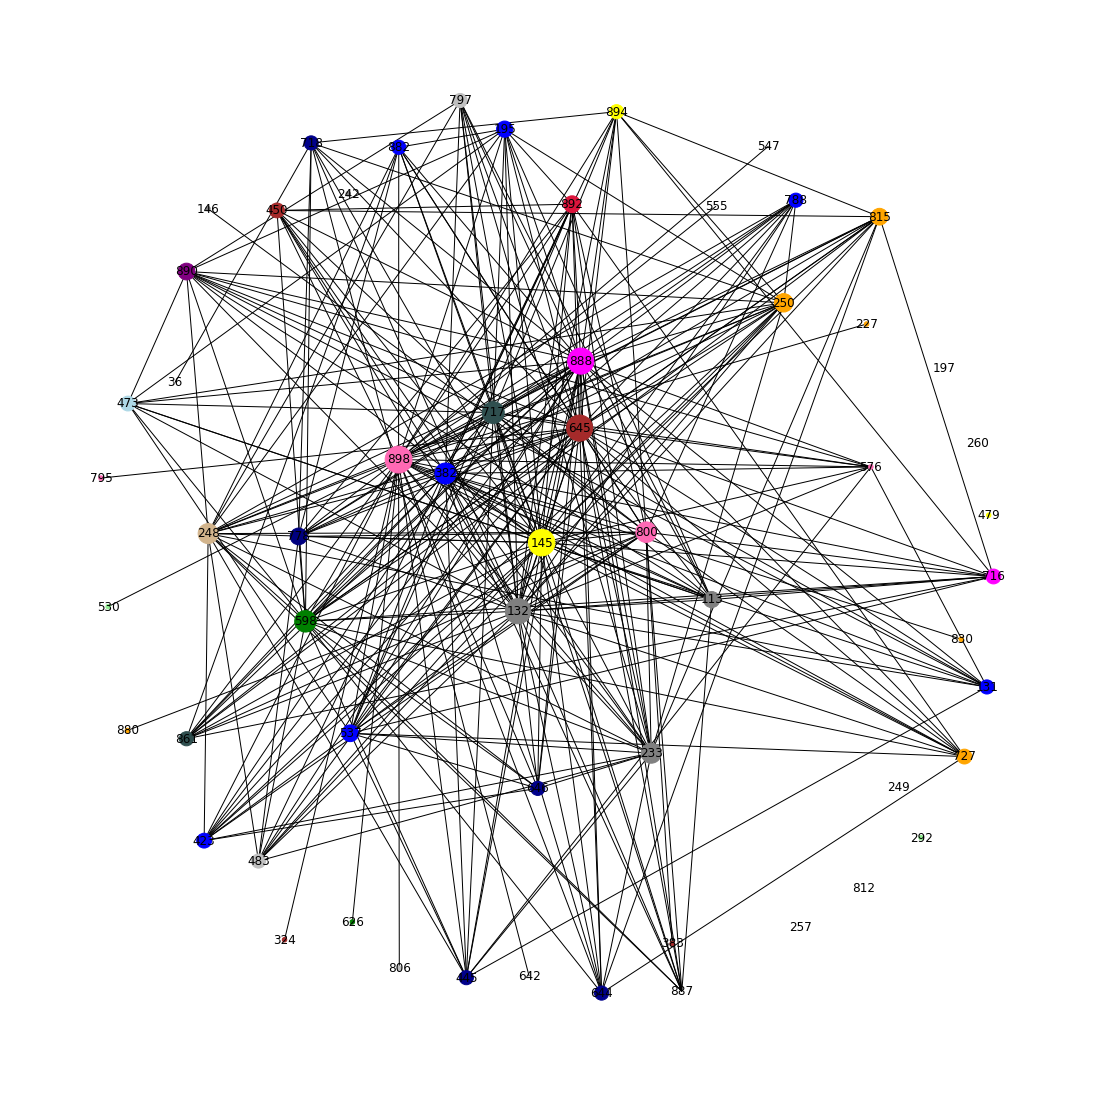

In [15]:
import json
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse.csgraph import floyd_warshall
from networkx.readwrite import json_graph
import math
import random

filename = './pokemon/top_10.json'
graph = json_graph.node_link_graph(json.load(open(filename)))

#print(graph)

pos = nx.spring_layout(graph, k = 2.3, iterations= 50)
plt.figure(figsize=(15,15))
print(nx.number_of_nodes(graph))

nx.draw(graph, pos=pos, with_labels = True, node_size = degree_node, node_color = type_color)
#plt.savefig('pokemon_graph_submit5.png')

#plt.show()
#graph.nodes
